In [171]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [172]:
dataset = keras.datasets.fashion_mnist

In [173]:
(train_Images, train_Labels) , (test_Images, test_Labels) = dataset.load_data()

In [174]:
labelNames = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [175]:
train_Images.shape

(60000, 28, 28)

In [176]:
train_Labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [177]:
test_Images.shape

(10000, 28, 28)

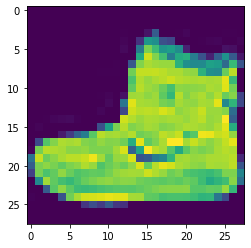

In [178]:
plt.figure()
plt.imshow(train_Images[0])
plt.show()

In [179]:
train_Images=train_Images / 255.0
test_Images=test_Images / 255.0


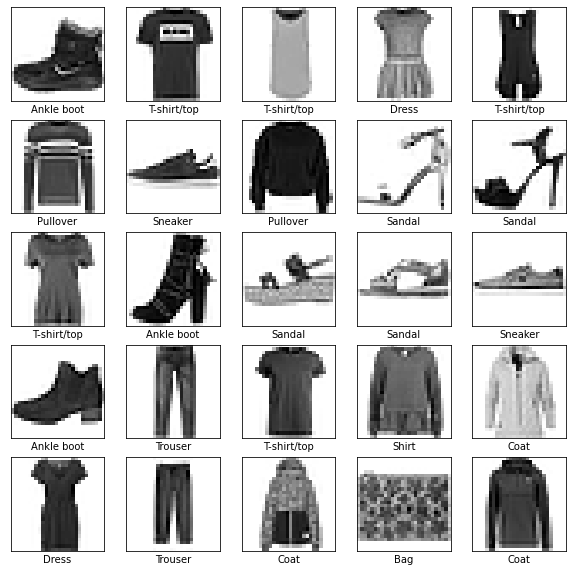

In [180]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_Images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_Labels[i]])
plt.show()   

In [181]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [182]:
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [183]:
model.fit(train_Images,train_Labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4994 - accuracy: 0.8253
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3771 - accuracy: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3367 - accuracy: 0.8773
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3134 - accuracy: 0.8854
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2951 - accuracy: 0.8911


In [184]:
test_loss , test_acc = model.evaluate(test_Images, test_Labels)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3651 - accuracy: 0.8643


In [185]:
print('Test Accuracy :' , test_acc)

Test Accuracy : 0.8643


In [186]:
predictions =model.predict(test_Images)

In [187]:
predictions[0]

array([4.7894929e-07, 9.2845669e-09, 8.4052722e-08, 4.1177803e-08,
       1.2257372e-06, 1.3038028e-03, 1.5998033e-06, 2.4273047e-02,
       1.7832168e-05, 9.7440183e-01], dtype=float32)

In [188]:
np.argmax(predictions[0])

9

In [189]:
test_Labels[0]

9

In [190]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
       color= 'blue'
    else:
       color='red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       labelNames[true_label]),
                                        color =color )
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label =predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color = "#777777")
    plt.ylim([0,1])
    predicted_label =np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')


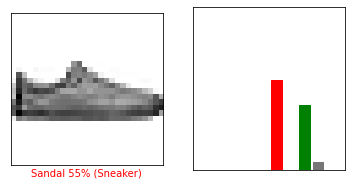

In [191]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_Labels,test_Images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_Labels)
plt.show()

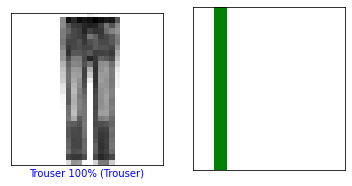

In [192]:
i=15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_Labels,test_Images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_Labels)
plt.show()

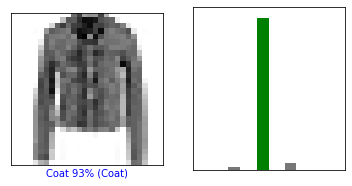

In [193]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_Labels,test_Images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_Labels)
plt.show()

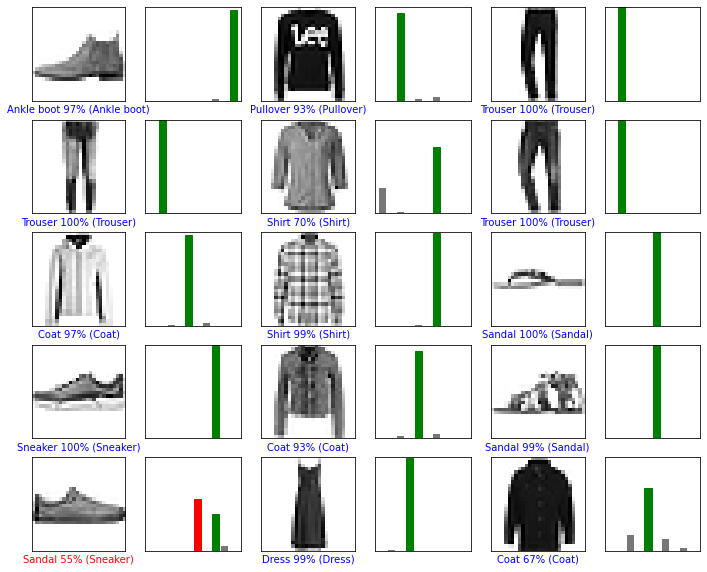

In [194]:
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_Labels,test_Images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_Labels)

plt.show()